ЗАДАНИЕ. В этом задании вам необходимо использовать набор данных ad.csv. 1) Датасет содежит 2 столбца: объявление (A/B) и действие (0/1). 2) Вам необходимо сформулировать гипотезу, провести ее проверку (пользуясь классическим подходом) и ответить на вопрос какое из объявлений лучше.

1) Контекст задачи. Команда ux-дизайнеров работает над улучшением рекламного баннера. Конверсия текущего объявления составляет 30%. Цель - достичь показателя конверсии 40%, т.е. новый баннер можно будет считать удачным, если конверсия повысится до 40%.

2) Формулировка гипотезы

H0: p(a) = p(b)
H1: p(a) ≠ p(b)
где p(a) и p(b) коэффициент конверсии инфлюенсеров А и В соответственно.

Уровень доверия 95%, то есть α =0,05

3) Набор данных

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [5]:
df = pd.read_csv('ad.csv')

In [19]:
#примерные значения и структура датафрейма
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


А - текущие объявления 
B - новое тестовое объявление 

action: 

0 - не было покупки
1 - была покупка

4. Статистика

Для просмотра результатов по сумме кликов по группам, используем Pivot_table

In [7]:
summary_df = df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)

In [8]:
summary_df

,action
ad_id,
A,304
B,372


Анонимная функция Lombda

Небольшие анонимные функции могут быть созданы с ключевым словом lambda. Эта функция возвращает сумму двух аргументов: lambda a, b: a + b. Лямбда-функции можно использовать везде, где требуются функциональные объекты. Они синтаксически ограничены одним выражением.

In [20]:
lambda_def = lambda x: len(x)

In [23]:
#вычислим стандартное отклонение и ошибку для каждой группы
summary_df ['total_count'] = df.pivot_table(values='action', index = 'ad_id', aggfunc=lambda x: len(x))

summary_df ['conversion_rate'] = df.pivot_table(values='action', index = 'ad_id')

In [22]:
summary_df

,action,total_count,conversion_rate
ad_id,,,
A,304,1000,0.304
B,372,1000,0.372


1. Реклама В эффективнее, чем А. 
2. Построим график пропорциональности

Text(0, 0.5, 'Коэф-т коверции')

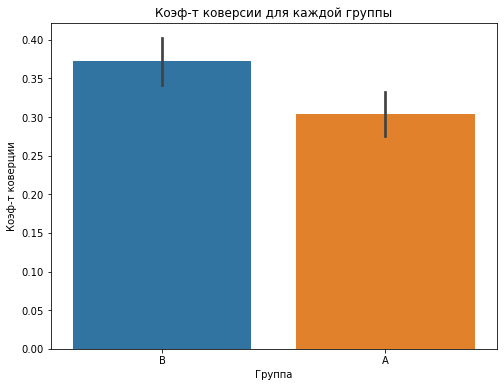

In [12]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Коэф-т коверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т коверции')

5. Проверка гипотезы

Можно ли принять, что разница коэффициентов конверсии А и В статистически значима? То есть можем ли мы быть уверены, что разница, которую мы наблюдаем, не случайна?

Проверяем гипотезу. 

Используем критерий Z-статистики для конверсии.

Z-статистика или z-оценка – это число, представляющее, на сколько стандартных отклонений выше или ниже среднего значения для совокупности составляет оценка, полученная с помощью z-критерия.

In [13]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [14]:
#Выделяем группы: контрольная А, тестовая В

control_results = df[df['ad_id'] == 'A'] ['action']
test_results = df[df['ad_id'] == 'B'] ['action']

Статистический критерий вернет нам значение p-value, которое позволит оценить, есть ли статистическая значимость в разнице конверсий, которую показывавет наш эксперимент.

Вычисляем p-value.

Передаем функции proportions_ztest следующие параметры: 1) кол-во кликов в каждой группе 2) кол-во просмотров


In [15]:
nobs = [control_results.count(), test_results.count()]
successes = [control_results.sum(), test_results.sum()]

z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic', z_stat)
print('p-value:', pval)

z statistic -3.2144492244084213
p-value: 0.0013069502732125403


In [16]:
alpha = 0.5

In [17]:
print (pval < alpha)

True


Промежуточные выводы:
Т.к. pval < 0.05, то отклоняем нулевую гипотезу. Новое объявление работает иначем, чем предыдущее объявление.

Доверительные интервалы

In [18]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал для контрольной группы А:', lower_con, ' - ', upper_con)
print('Доверительный интервал для контрольной группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы А: 0.29418892115262896  -  0.31381107884737103
Доверительный интервал для контрольной группы B: 0.3616907600947741  -  0.3823092399052259


Промежуточные выводы:
    Новый дизайн объявления В, могут улучшить показатели до 40%. 
    
ИТОГ:
В ходе АВ-тестирования текущего и тестового вариантов рекламного баннера выявлено, что вариант (В) имеет больший коэффициент конверсии. Внедрение нового дизайна объявления может повысить коэффициент конверсии до 40%.